In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_theme()  # sets the default

In [45]:
x = np.linspace(-3, 3, 100)

# kernels 
def gaussian_kernel(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)

def triangular_kernel(x):
    return np.where((x >= -1) & (x <= 1), 1-np.abs(x), 0)

def epanechnikov_kernel(x):
    return np.where((x >= -1) & (x <= 1), 3/4*(1-x**2), 0)

def uniform_kernel(x):
    return np.where((x >= -1) & (x <= 1), 1/2, 0)

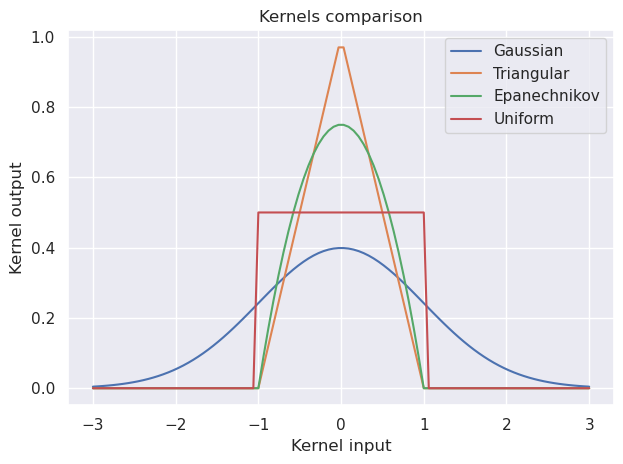

In [63]:
fig, ax = plt.subplots()
ax.plot(x, gaussian_kernel(x), label='Gaussian')
ax.plot(x, triangular_kernel(x), label='Triangular')
ax.plot(x, epanechnikov_kernel(x), label='Epanechnikov')
ax.plot(x, uniform_kernel(x), label='Uniform')
ax.set_title('Kernels comparison')
ax.set_xlabel('Kernel input')
ax.set_ylabel('Kernel output')
plt.legend()
plt.tight_layout()
plt.savefig('../../assets/images/optimization/kernels_comparison.png', bbox_inches='tight');

# Kernel density estimation

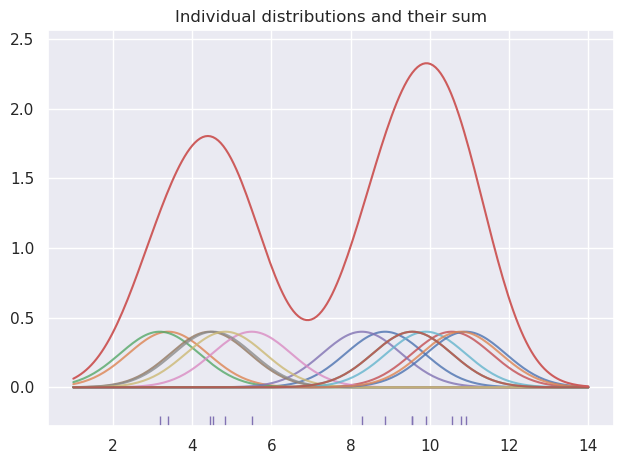

In [123]:
rng = np.random.default_rng(43)

size = 7
x = np.concatenate(
    [rng.uniform(1, 10, 5), rng.uniform(2, 4, 4), rng.uniform(7, 9, 5)]
     ) + 2

x_overall = np.linspace(1, 14, 200)

fig, ax = plt.subplots()

bw = 1
y = np.zeros(x_overall.size)
for x_i in x:
    y_i = gaussian_kernel((x_overall-x_i)/bw)
    ax.plot(x_overall, y_i, alpha=0.8)
    y += y_i

sns.rugplot(x)
ax.plot(x_overall, y, color='indianred')
ax.set_title('Individual distributions and their sum')
plt.tight_layout()
plt.savefig('../../assets/images/optimization/kernels_density_and_sum.png', bbox_inches='tight');

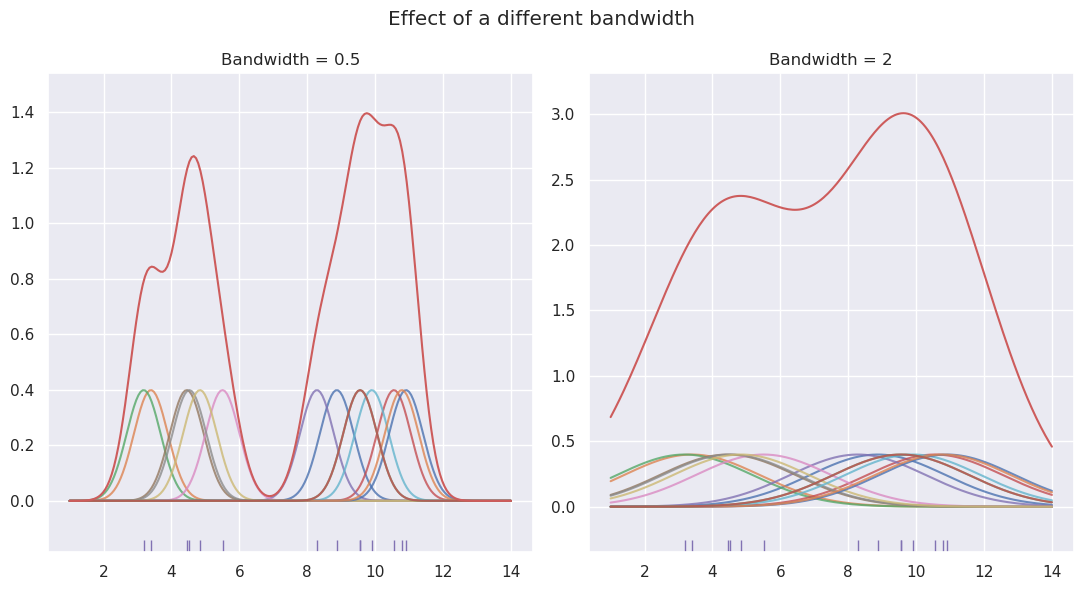

In [133]:
rng = np.random.default_rng(43)

size = 7
x = np.concatenate(
    [rng.uniform(1, 10, 5), rng.uniform(2, 4, 4), rng.uniform(7, 9, 5)]
     ) + 2

x_overall = np.linspace(1, 14, 200)

fig, ax = plt.subplots(1, 2, figsize=(11, 6))

for ax, bw in zip(ax, [0.5, 2]):
    y = np.zeros(x_overall.size)
    for x_i in x:
        y_i = gaussian_kernel((x_overall-x_i)/bw)
        ax.plot(x_overall, y_i, alpha=0.8)
        y += y_i
    
    sns.rugplot(x, ax=ax)
    ax.plot(x_overall, y, color='indianred')
    ax.set_title(f'Bandwidth = {bw}')
fig.suptitle('Effect of a different bandwidth')
plt.tight_layout()
plt.savefig('../../assets/images/optimization/kernels_density_bandwidth_effect.png', bbox_inches='tight');